<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [37]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import math
import pickle
pd.set_option('display.max_columns', None)


# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler


# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Configuración warnings
# -----------------------------------------------------------------------
#from src import soporte_preprocesamiento as sp
#from src import soporte_encoding as se
#from src import soporte_scaling as ss
from src import soporte_clustering as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = pd.read_csv("datos/WrestlingWorldTournament.csv", index_col = 0)

In [6]:
exploracion = sc.Exploracion(df)

In [7]:
exploracion.explorar_datos()

5 registros aleatorios:


,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
163,Erin Kelley,Female,32,158.0,USA,67,"Boxing, Judo, Kick-Boxing",4,4,7,6,Fight Zone Wrestling,2008,462
187,Harris Cunningham,Male,26,194.5,Australia,113,"Boxing, Kick-Boxing, MMA",5,7,7,7,Fight Zone Wrestling,2010,58
7,Alexander Bracamonte,Male,34,180.5,Egypt,98,"Karate, Kick-Boxing, MMA",3,8,5,7,World Wrestling Entertainment,2002,36
389,Richard Burton,Male,25,180.5,USA,94,"Karate, MMA",4,6,6,6,Consejo Global de Lucha Libre,2007,264
418,Roy Murphy,Male,35,187.0,Australia,103,Karate,2,5,7,7,Consejo Global de Lucha Libre,2009,408




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB
None


Duplicados en el DataFrame:
0


Estadísticas descriptivas de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
name,500,500,Aaron Peavy,1
gender,500,2,Female,265
nationality,500,8,France,118
sports,500,31,Karate,42
federation,500,3,Fight Zone Wrestling,206




Número de valores nulos por columna:
name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64


Distribución de valores categóricos:

Columna: name
name
Aaron Peavy        1
Matt Bailey        1
Milton Rico        1
Mickey Lister      1
Micheal Kurz       1
                  ..
Eric Jones         1
Eric Hutchinson    1
Emma Bryant        1
Elmer Perez        1
Zenaida Flagge     1
Name: count, Length: 500, dtype: int64

Columna: gender
gender
Female    265
Male      235
Name: count, dtype: int64

Columna: nationality
nationality
France       118
Japan        116
USA          115
Australia     64
Egypt         42
England       26
Argentina     12
India          7
Name: count, dtype: int64

Columna: sports
sports
Karate                                    42
MMA       

,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
age,1.000000,-0.001694,0.044624,-0.003731,0.016052,-0.036051,0.219514,-0.858723,-0.208136
height,-0.001694,1.000000,0.982154,0.072840,0.658785,-0.484157,0.144129,0.005482,-0.251894
weight,0.044624,0.982154,1.000000,0.071260,0.654799,-0.486668,0.157628,-0.039413,-0.257785
hours_per_day,-0.003731,0.072840,0.071260,1.000000,-0.025897,0.326623,0.275585,-0.136393,-0.458479
strength,0.016052,0.658785,0.654799,-0.025897,1.000000,-0.384900,0.116703,0.017604,-0.383859
agility,-0.036051,-0.484157,-0.486668,0.326623,-0.384900,1.000000,-0.005940,-0.054115,-0.343249
mental,0.219514,0.144129,0.157628,0.275585,0.116703,-0.005940,1.000000,-0.218854,-0.423994
year_start,-0.858723,0.005482,-0.039413,-0.136393,0.017604,-0.054115,-0.218854,1.000000,0.323980
rank,-0.208136,-0.251894,-0.257785,-0.458479,-0.383859,-0.343249,-0.423994,0.323980,1.000000


- Tras analizar el conjunto de datos, eliminaremos las siguientes columnas:
    - federation: la federación no tiene un impacto directo en los planes de entrenamiento.
    - name: contiene valores únicos, etiquetas que se relacionan con cada atleta.
    - rank: el rank no debe influir de manera directa en los planes de entrenamiento.
    - year_start: el año de inicio no debería tener efecto directo sobre los planes de entrenamiento.
    - sports: tenemos muchas categorías únicas, resultantes de los deportes que practica cada atleta, por lo que son muy específicas.

In [8]:
df.drop(columns= ['federation', 'name', 'rank', 'year_start', 'sports'], inplace= True)

In [9]:
df.shape

(500, 9)

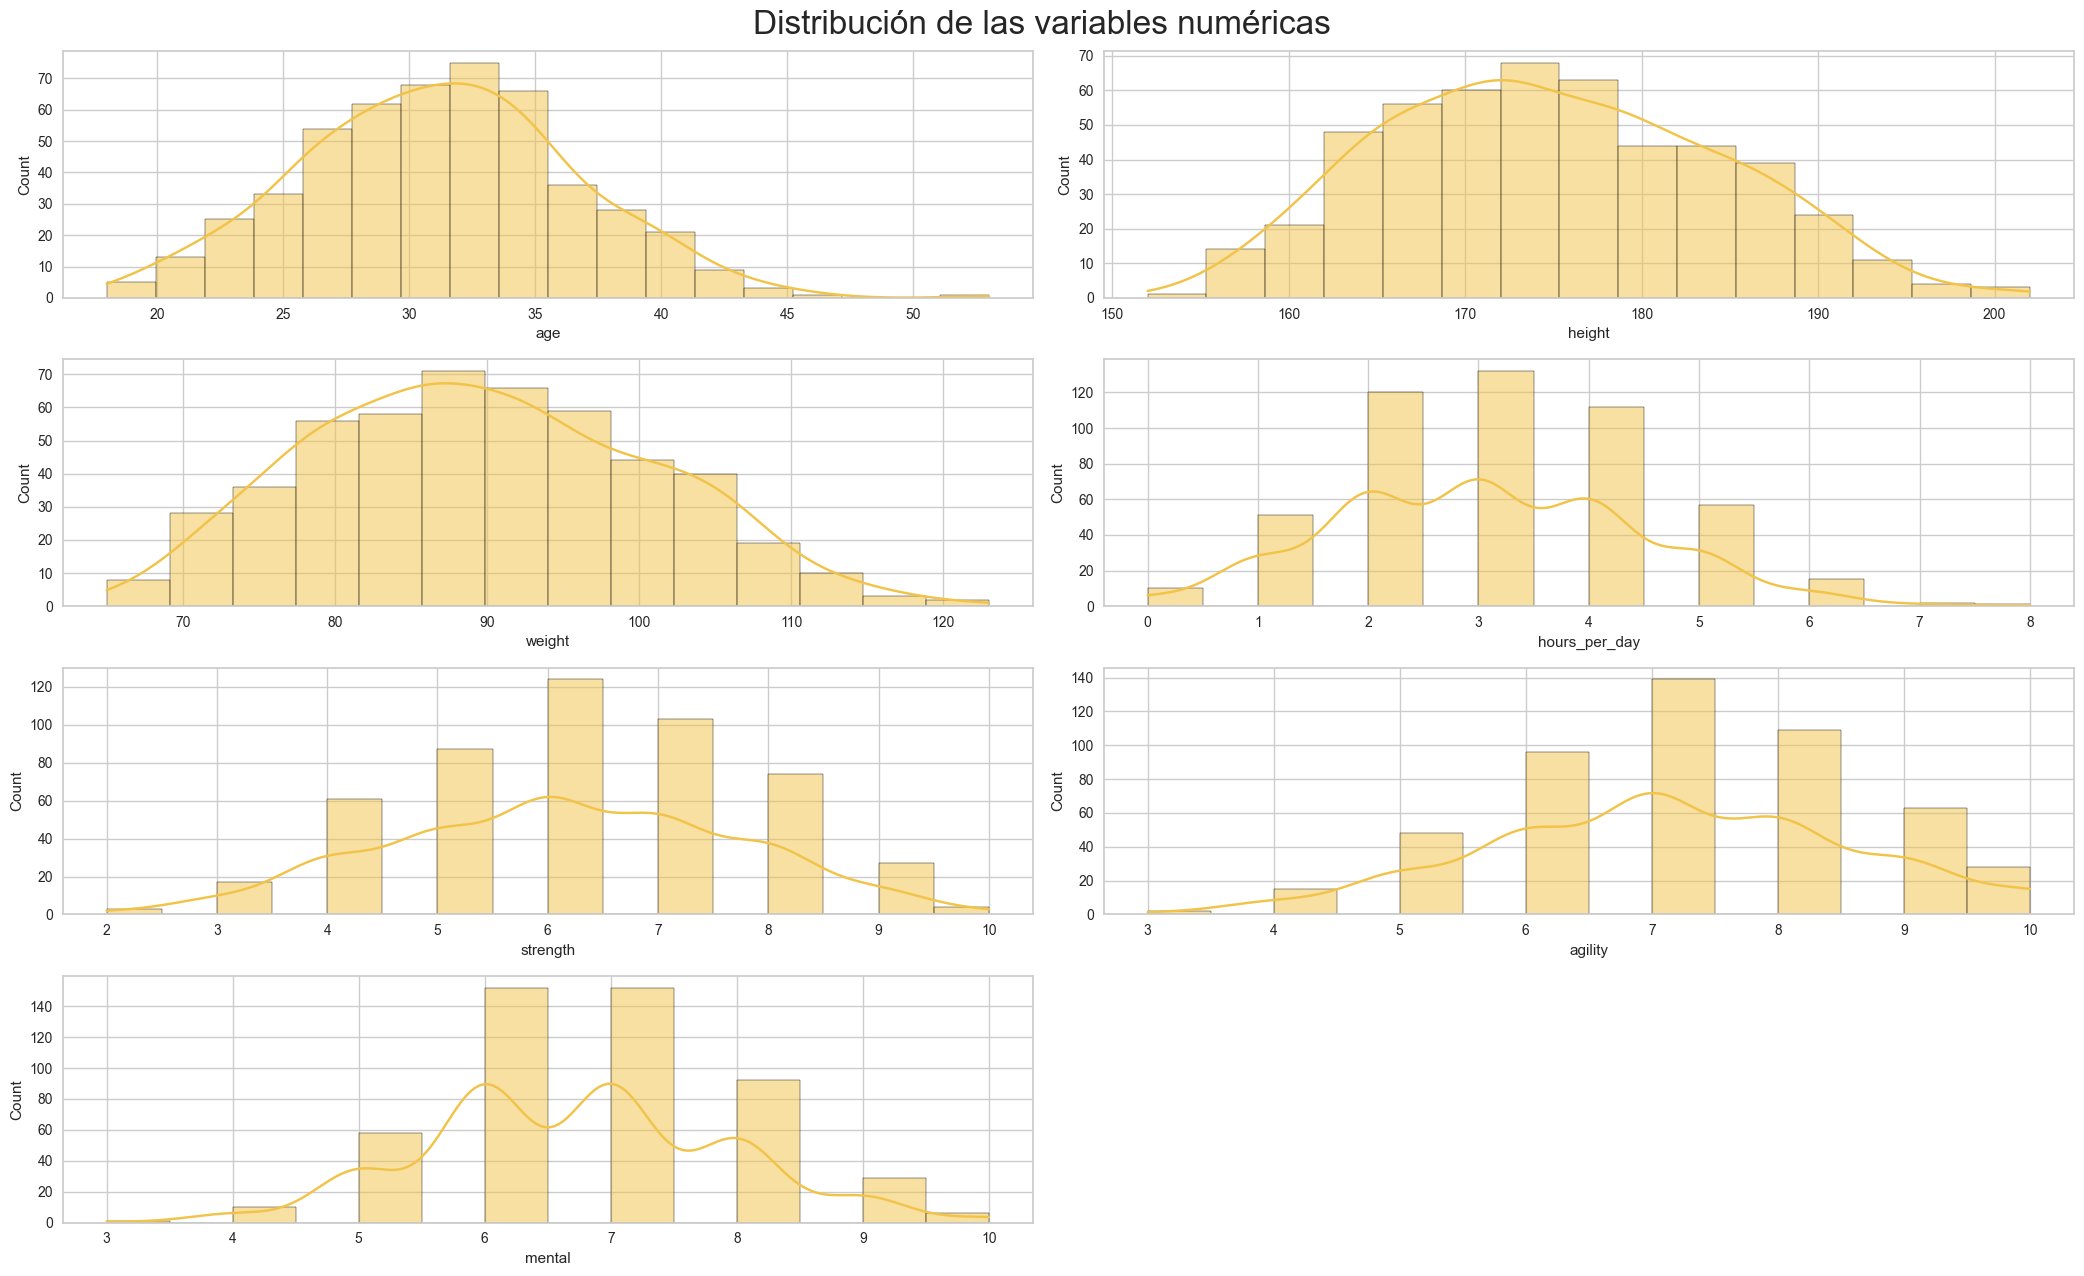

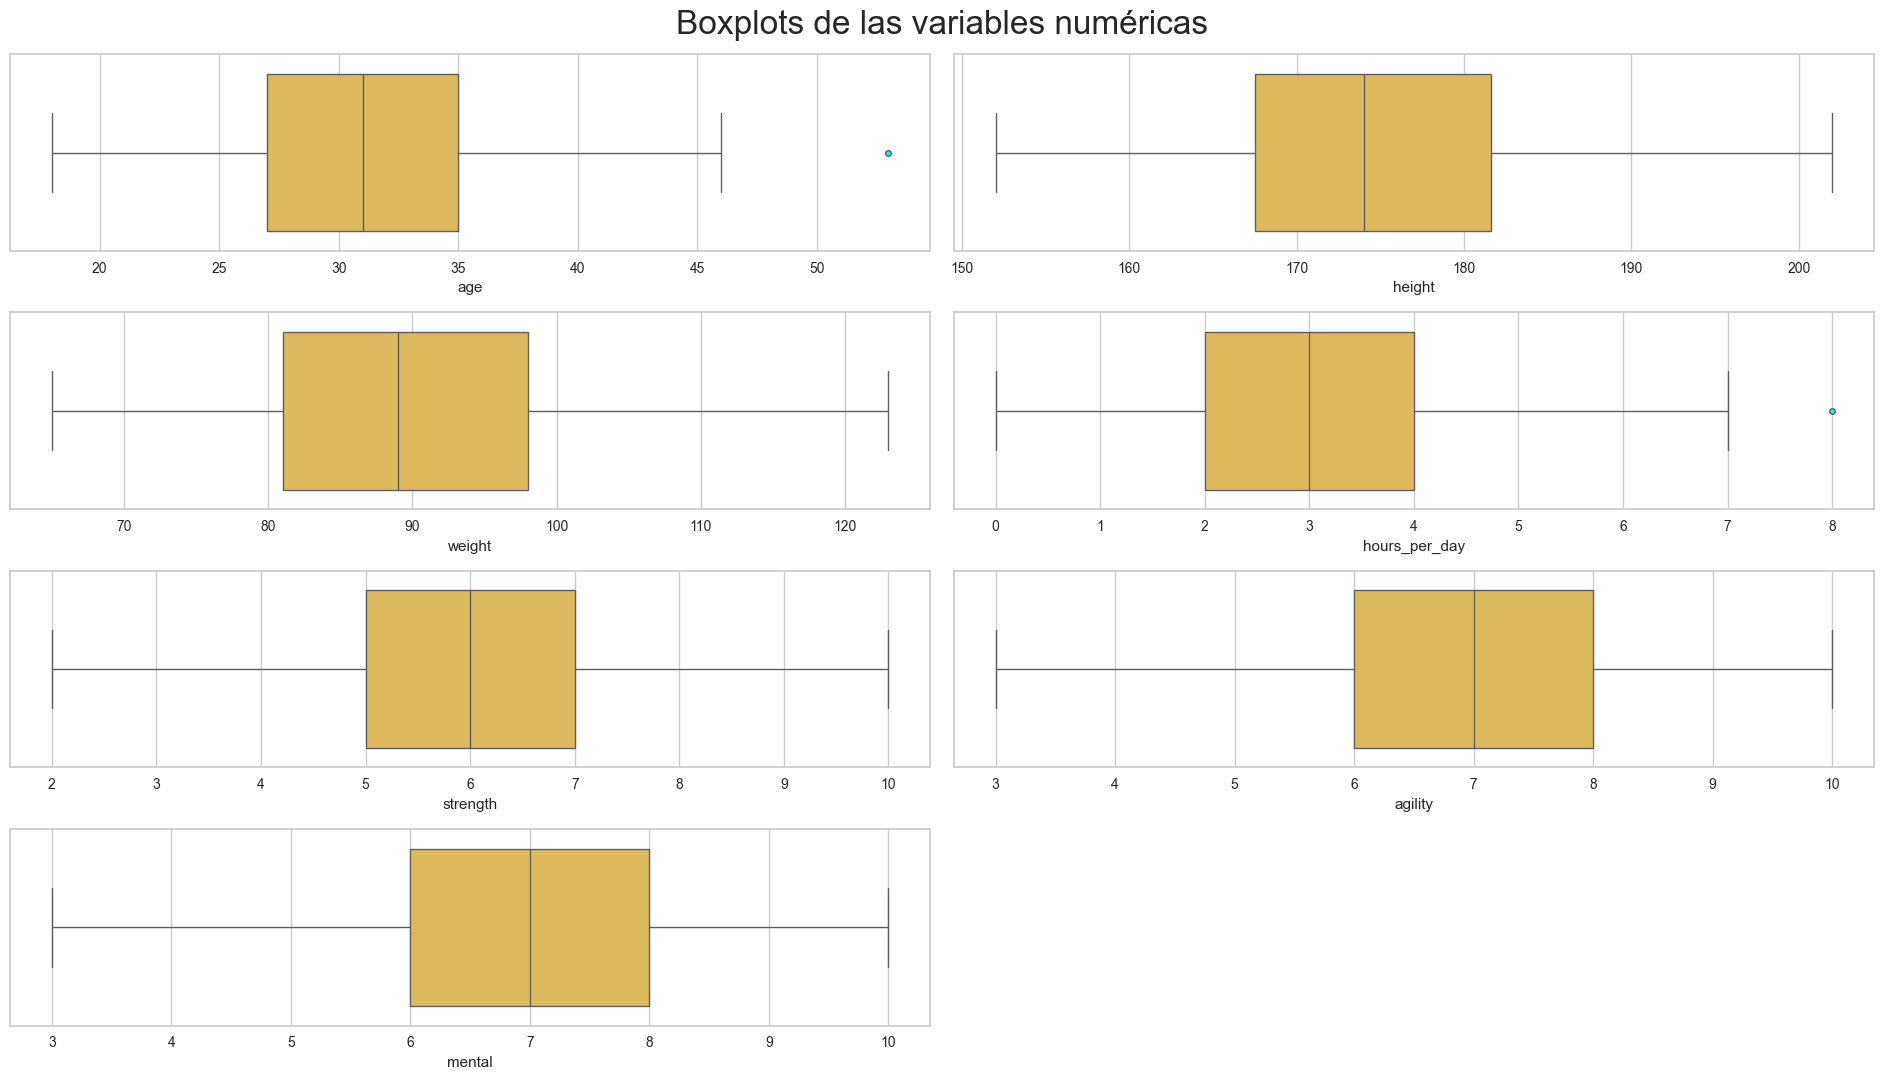

In [10]:
exploracion.visualizar_numericas()

- Podemos ver que, aunque numéricas, algunas de las variables se comportan como categóricas, por tener pocas categorías y son etiquetas. Son hours_per_day, strength, agility y mental.

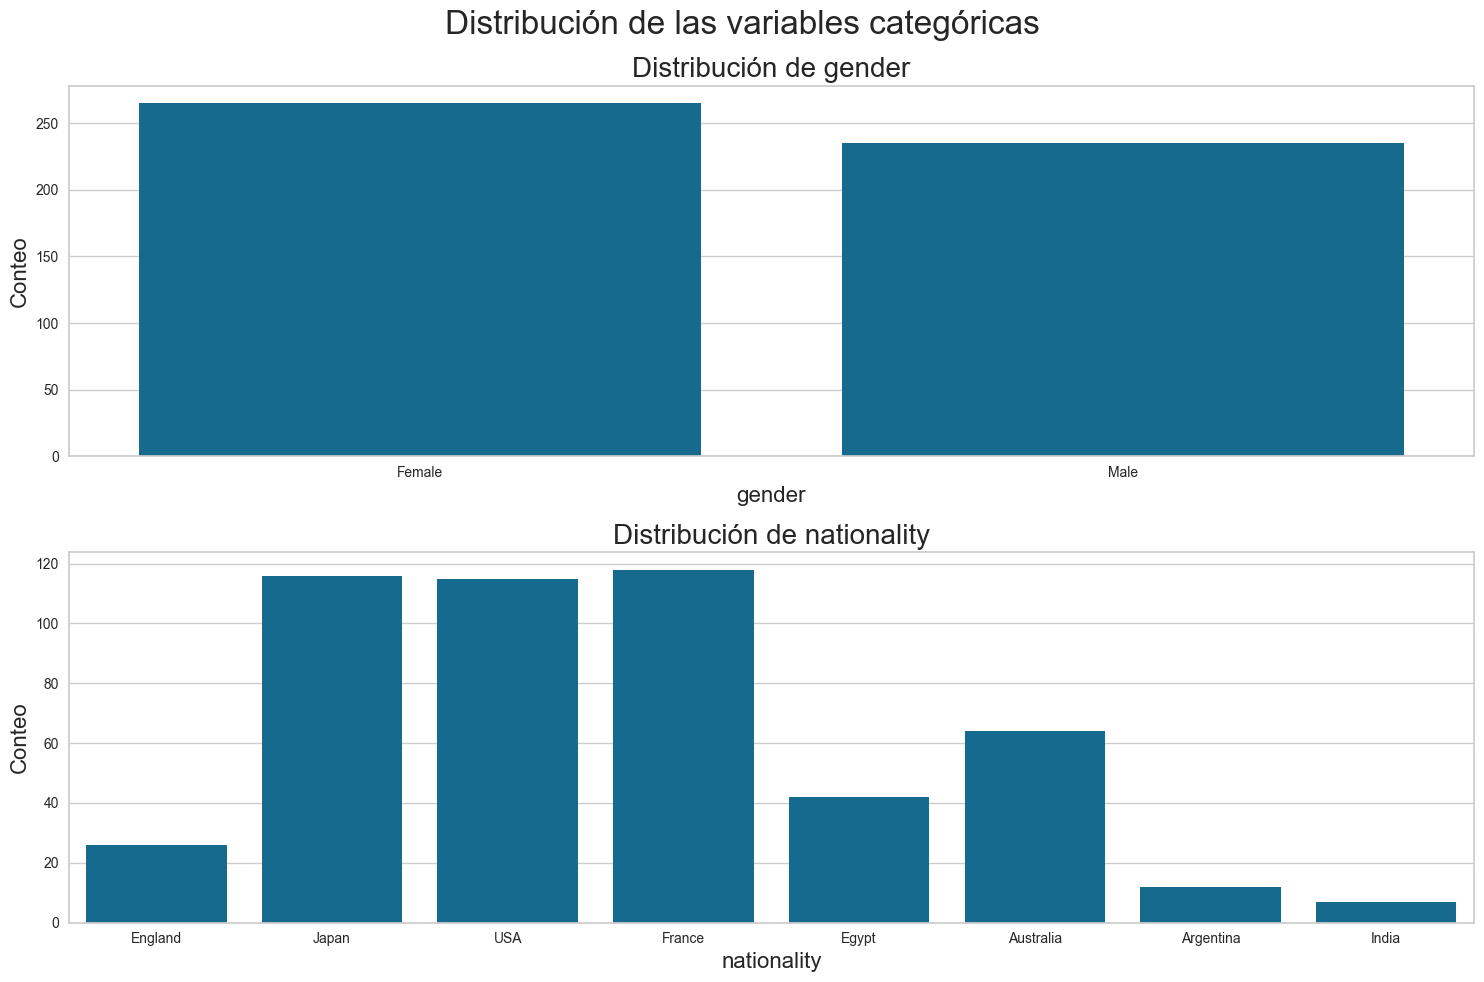

In [11]:
exploracion.visualizar_categoricas()

- En el análisis de las features categóricas, vemos que hay un balance entre las categorías de gender, pero desbalance en nationality. Lanzaremos el primer cluster sin gestionar esto.

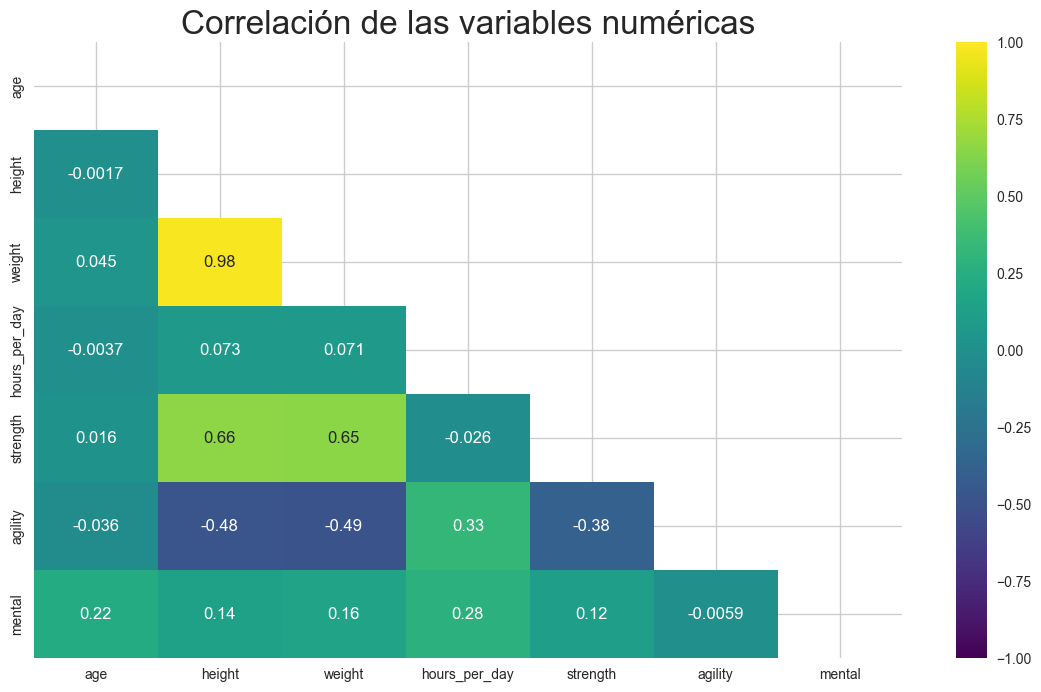

In [12]:
exploracion.correlacion()

- Vemos correlaciones fuertes en negativo y en positivo entre algunas variables:
    - En negativo: year_start y age, tiene sentido, a mayor edad, menor año de inicio.
    - En positivo: hours_per_day y strength con height y weight. A mayor entrenamiento y mayor fuerza, son también mayores la altura y el peso.

# Encoding

- Tendremos que encodear nuestras features categóricas, en este caso, gender y nationality.
- Usaremos el Frequency Encoder, dado que mantiene la relevancia de cada categoría en el caso de la nacionalidad, y One-Hot Encoder para el género.

In [13]:
diccionario_encoding = {
    "onehot": ['gender'],
    "dummies": [],
    "ordinal": {},
    "label": [],
    "frequency": ['nationality'],
    "target": [],
    "catboost": []
}

encoding = sc.Encoding(dataframe=df, diccionario_encoding=diccionario_encoding, variable_respuesta="")

encoding.one_hot_encoding()
df_freq = encoding.frequency_encoding()

In [14]:
df_freq

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male
0,41,165.0,0.052,82,3,7,8,7,1.0,0.0
1,36,185.0,0.232,100,0,8,5,9,0.0,1.0
2,29,178.5,0.232,93,4,8,8,7,0.0,1.0
3,39,187.5,0.232,107,3,7,6,8,0.0,1.0
4,29,158.0,0.230,72,1,5,7,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
495,34,185.5,0.236,104,2,9,6,5,0.0,1.0
496,31,161.5,0.236,71,5,4,9,6,1.0,0.0
497,22,188.5,0.236,102,3,8,8,7,0.0,1.0
498,32,177.0,0.236,92,2,5,5,5,1.0,0.0


## Gestión de Outliers

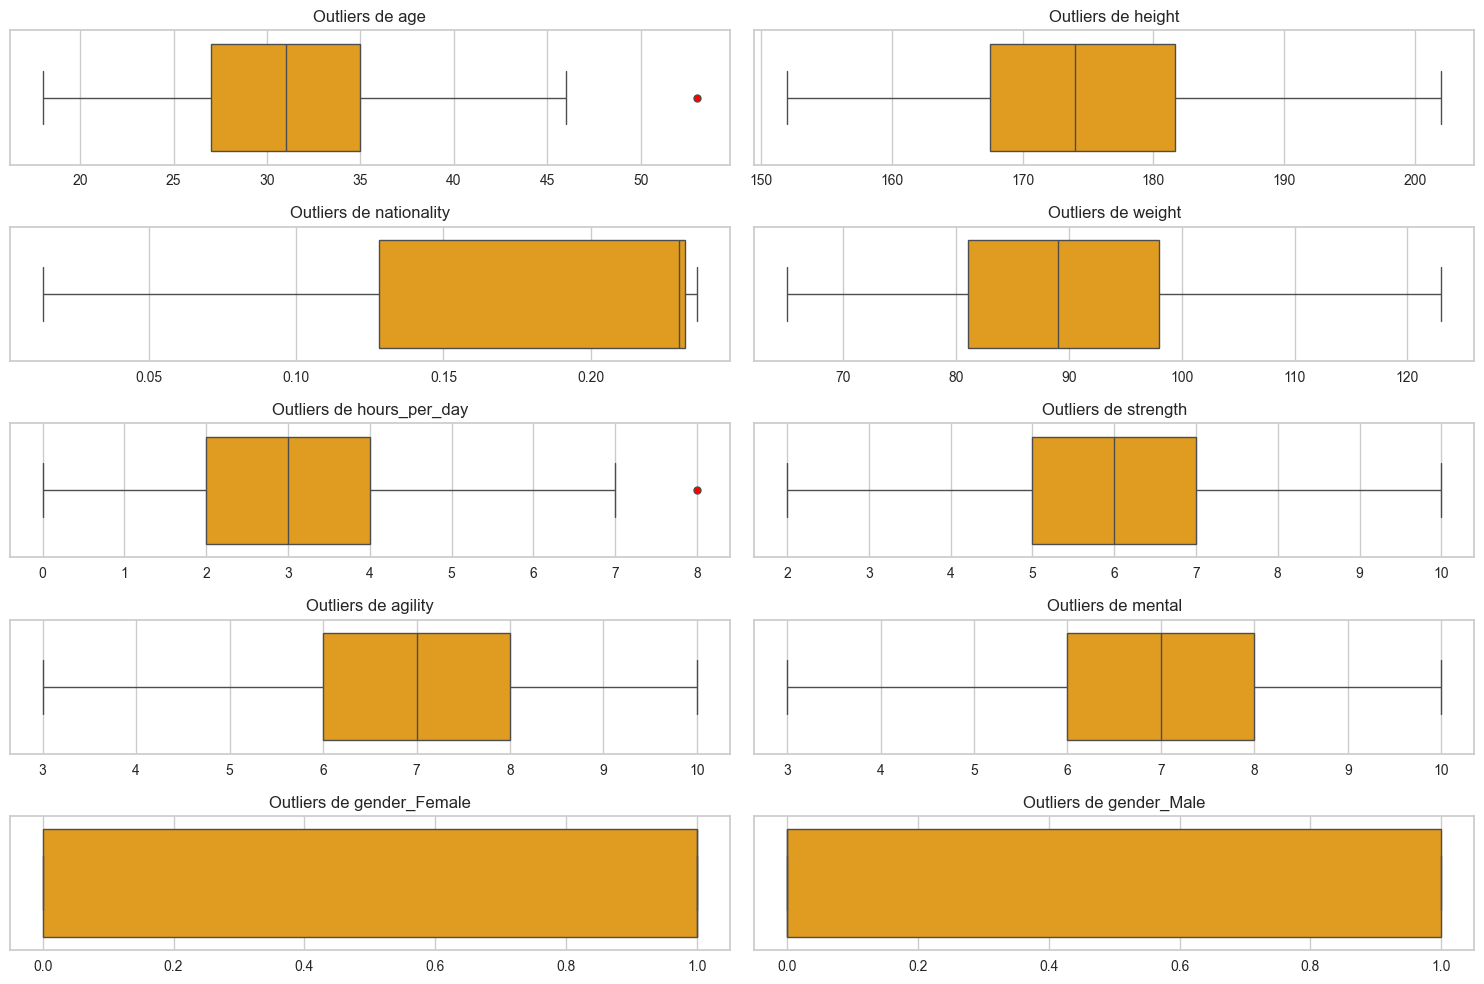

In [15]:
sc.detectar_outliers(df_freq)

- Dado que, gráficamente nos cuesta analizar outliers, recurriremos al método IFO para identificarlos y, si fuera necesario, tratarlos.

In [16]:
col_numericas = df_freq.select_dtypes(include=np.number).columns
contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 200]

sc.outliers_isolation_forest(df_freq, contaminacion, estimadores)

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200
0,41,165.0,0.052,82,3,7,8,7,1.0,0.0,1,1,1,1,1,1,1,1,1
1,36,185.0,0.232,100,0,8,5,9,0.0,1.0,1,1,1,1,1,1,1,1,1
2,29,178.5,0.232,93,4,8,8,7,0.0,1.0,1,1,1,1,1,1,1,1,1
3,39,187.5,0.232,107,3,7,6,8,0.0,1.0,1,1,1,1,1,1,1,1,1
4,29,158.0,0.230,72,1,5,7,7,1.0,0.0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,34,185.5,0.236,104,2,9,6,5,0.0,1.0,1,1,1,1,1,1,1,1,1
496,31,161.5,0.236,71,5,4,9,6,1.0,0.0,1,1,1,1,1,1,1,1,1
497,22,188.5,0.236,102,3,8,8,7,0.0,1.0,1,1,1,1,1,1,1,1,1
498,32,177.0,0.236,92,2,5,5,5,1.0,0.0,1,1,1,1,1,1,1,1,1


In [17]:
total_columnas = df.shape[1]
cantidad_col = total_columnas * 0.3
df_filtrado = df_freq[(df_freq == -1).sum(axis=1) > cantidad_col]
df_filtrado.head()

,age,height,nationality,weight,hours_per_day,strength,agility,mental,gender_Female,gender_Male,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200
11,26,201.5,0.232,117,3,9,6,6,0.0,1.0,1,1,1,-1,1,1,1,-1,-1
12,42,180.0,0.230,98,4,4,7,8,1.0,0.0,1,1,1,1,1,1,-1,-1,-1
35,32,155.5,0.236,68,5,4,10,8,1.0,0.0,1,1,1,1,-1,1,-1,-1,-1
46,29,159.5,0.024,72,0,4,8,6,1.0,0.0,1,1,1,-1,-1,-1,1,-1,-1
50,27,202.0,0.052,123,8,7,7,8,0.0,1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [18]:
df_freq.drop(columns = ['outliers_ifo_0.01_10', 'outliers_ifo_0.01_100',
       'outliers_ifo_0.01_200', 'outliers_ifo_0.05_10',
       'outliers_ifo_0.05_100', 'outliers_ifo_0.05_200', 'outliers_ifo_0.1_10',
       'outliers_ifo_0.1_100', 'outliers_ifo_0.1_200'], inplace=True)

## Estandarización

In [19]:
df_freq.columns

Index(['age', 'height', 'nationality', 'weight', 'hours_per_day', 'strength',
       'agility', 'mental', 'gender_Female', 'gender_Male'],
      dtype='object')

- Vamos a estandarizar nuestro conjunto de datos. Utilizaremos el Standard Scaler dado que, hemos mantenido los outliers, así que, nos interesa "suavizarlos."

In [21]:
df_standard = sc.aplicar_escaladores(df_freq, ['hours_per_day', 'strength', 'agility', 'mental', 'age', 'weight', 'height'], [MinMaxScaler()])
df_standard.drop(columns=['hours_per_day', 'strength', 'agility', 'mental', 'age', 'weight', 'height'], inplace= True)
df_standard.head(1)

,nationality,gender_Female,gender_Male,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,age_minmax,weight_minmax,height_minmax
0,0.052,1.0,0.0,0.375,0.625,0.714286,0.571429,0.657143,0.293103,0.26


# Modelo de clustering: KMeans

In [22]:
df_standard.head()

,nationality,gender_Female,gender_Male,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,age_minmax,weight_minmax,height_minmax
0,0.052,1.0,0.0,0.375,0.625,0.714286,0.571429,0.657143,0.293103,0.26
1,0.232,0.0,1.0,0.000,0.750,0.285714,0.857143,0.514286,0.603448,0.66
2,0.232,0.0,1.0,0.500,0.750,0.714286,0.571429,0.314286,0.482759,0.53
3,0.232,0.0,1.0,0.375,0.625,0.428571,0.714286,0.600000,0.724138,0.71
4,0.230,1.0,0.0,0.125,0.375,0.571429,0.571429,0.314286,0.120690,0.12


### Silhouette Score Elbow

In [24]:
clustering = sc.Clustering(df_standard)

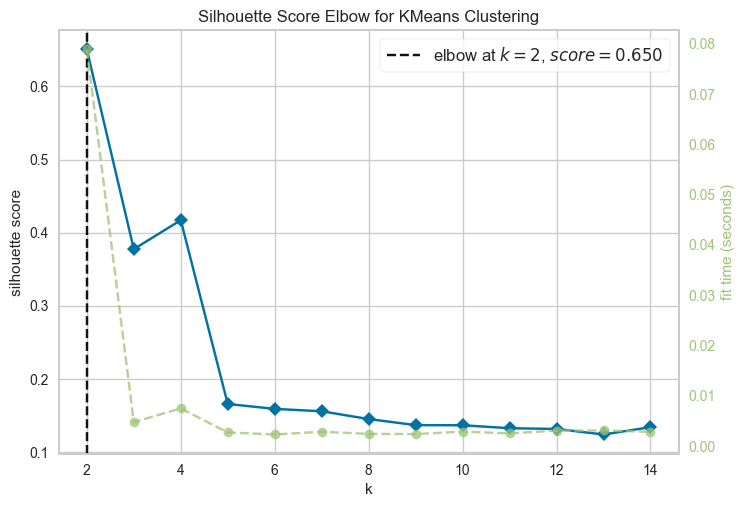

In [355]:
clustering.sacar_clusters_kmeans()

In [ ]:
df_kmeans, labels = clustering.modelo_kmeans(df_standard, 2)

In [ ]:
df_kmeans.head()

,nationality,gender_Female,gender_Male,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,age_minmax,weight_minmax,height_minmax,clusters_kmeans
0,0.052,1.0,0.0,0.375,0.625,0.714286,0.571429,0.657143,0.293103,0.26,1
1,0.232,0.0,1.0,0.000,0.750,0.285714,0.857143,0.514286,0.603448,0.66,0
2,0.232,0.0,1.0,0.500,0.750,0.714286,0.571429,0.314286,0.482759,0.53,0
3,0.232,0.0,1.0,0.375,0.625,0.428571,0.714286,0.600000,0.724138,0.71,0
4,0.230,1.0,0.0,0.125,0.375,0.571429,0.571429,0.314286,0.120690,0.12,1


## Métricas

In [358]:
clustering.calcular_metricas(labels)

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.702987,0.442456,"{0: 235, 1: 265}"


- El silhouette evalúa la calidad del agrupamiento al medir qué tan bien están separados y definidos los clusters. Con un valor de 1, los clusters están perfectamente definidos y separados, mientras que en 0 se superponen significativamente. Ante un valor negativo, los clusters están mal definidos, y muchos puntos están asignados al cluster incorrecto. Se entiende como buen agrupamiento uno mayor que 0.5.

- En nuestro caso, un valor de 0.70 supone una alta fiabilidad del modelo.

- El BDI, por su parte, evalúa la calidad del agrupamiento basado en la relación entre la dispersión interna de los clusters y la distancia entre clusters. Un valor de 0 es ideal, y puede tender a infinito.

- La cardinalidad nos muestra los elementos de cada cluster, en este caso, repartidos de manera similar.

## Plot de clusters

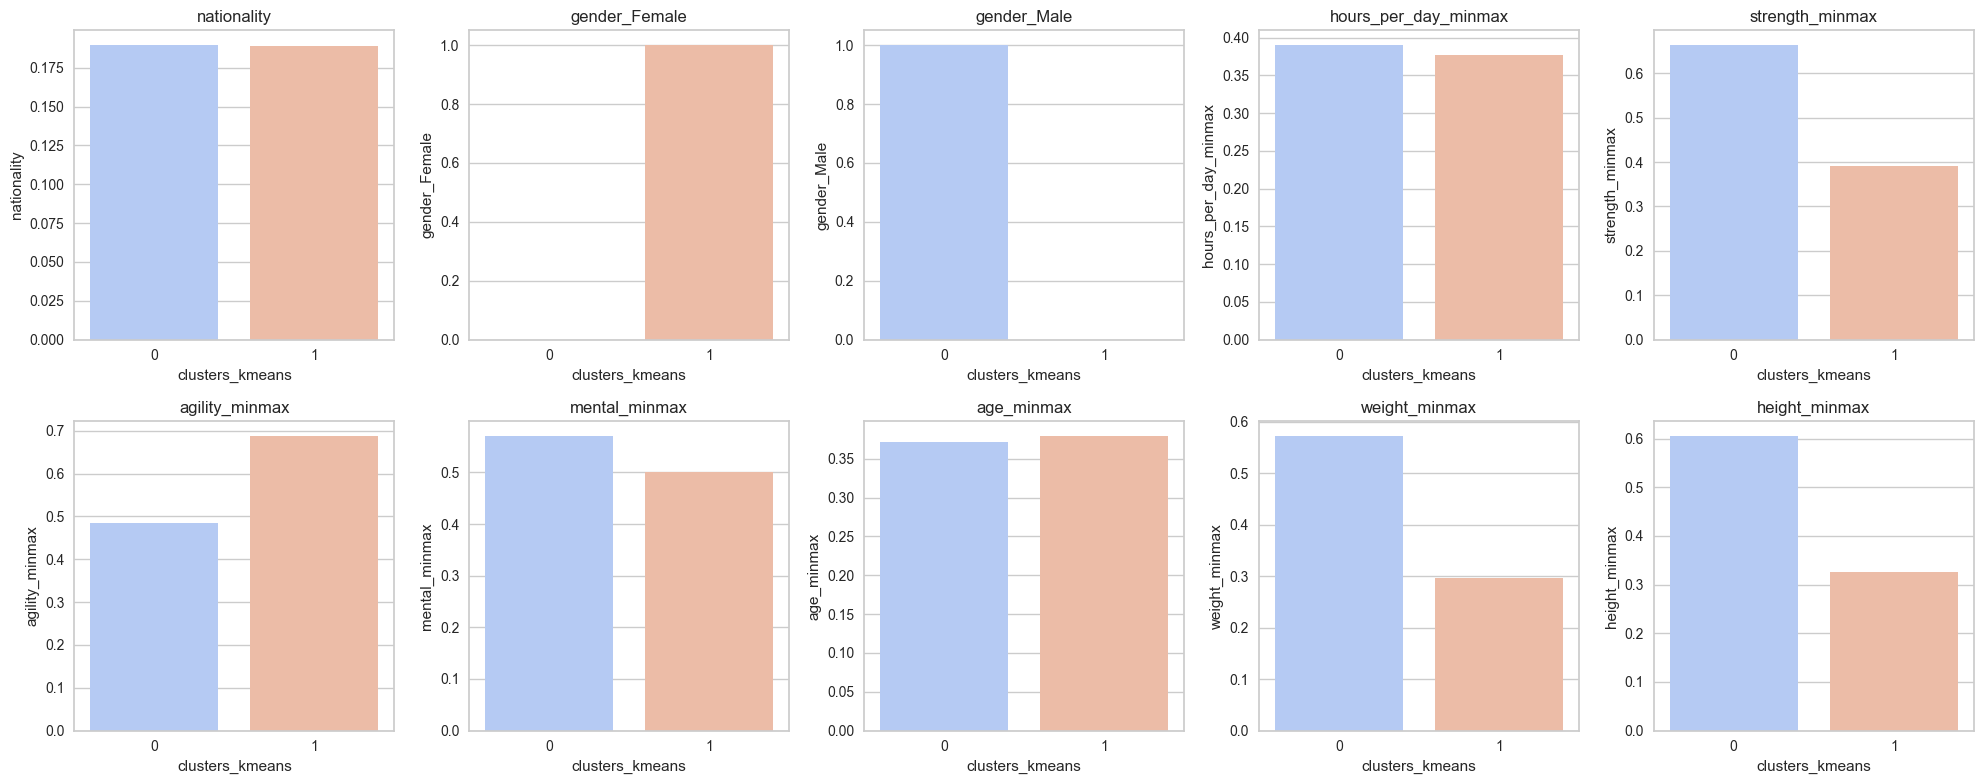

In [ ]:
clustering.plot_clusters(df_kmeans, "clusters_kmeans")

- Podemos ver que, la nacionalidad se agrupa casi por igual, lo que quiere decir que no sería un feature decisivo para el modelo.Esta misma observación la vemos para la edad y horas del día entrenadas.

- Caso contrario en el sexo, donde agrupa en un cluster a los hombres y en otro a las mujeres, esto tiene sentido por cuanto, en temas deportivos, hay diferencias significativas. 

- En el caso del peso y la estatura, se agrupan en dos clusters bien definidos. Tiene sentido si pensamos en que, son dos factores que tienen gran influencia en el entrenamiento de los atletas, y se comportan de manera similar por cuanto, a mayor estatura, normalmente mayor peso. Este cluster es el de los hombres.

- Misma situación con la fuerza y la agilidad, que vemos, son inversas. Los hombres son más fuertes y las mujeres más ágiles. Esto nuevamente tiene sentido por cuanto, un atleta con más fuerza tenderá a ser menos ágil, y viceversa.

- Para mental, el comportamiento es bastante similar.

## Radar Plot

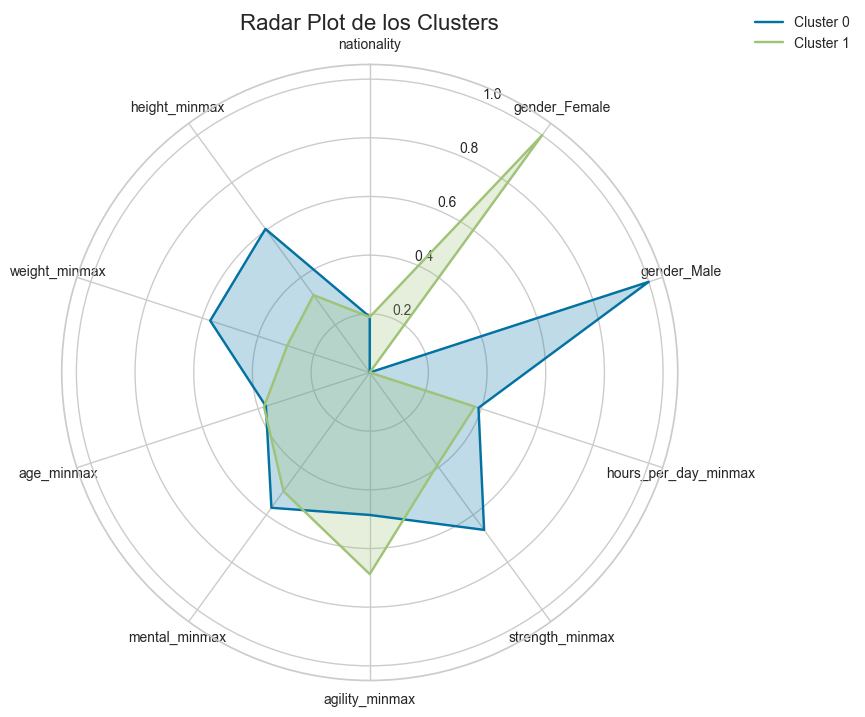

In [ ]:
# Variables que deseas incluir en el radar plot
variables = ['nationality', 'gender_Female', 'gender_Male', 'hours_per_day_minmax',
       'strength_minmax', 'agility_minmax', 'mental_minmax', 'age_minmax',
       'weight_minmax', 'height_minmax']

clustering.radar_plot(df_kmeans, variables, "clusters_kmeans")

- En el radar plot, observamos clusters bien definidos para los géneros, y luego cómo uno destaca por mayor peso, estatura y fuerza, el de los hombres. Esto podría corresponderse con la realidad, donde los hombres suelen definirse por mayor valores en estas características.

- La edad y la nacionalidad están casi igualados.

- Por su parte, el cluster verde destaca por la habilidad, que son, en este caso, las mujeres.

# Aglomerativo

- Para visualizar de manera sencilla los clusters que ha creado el modelo aglomerativo, vamos a plotear un dendograma.

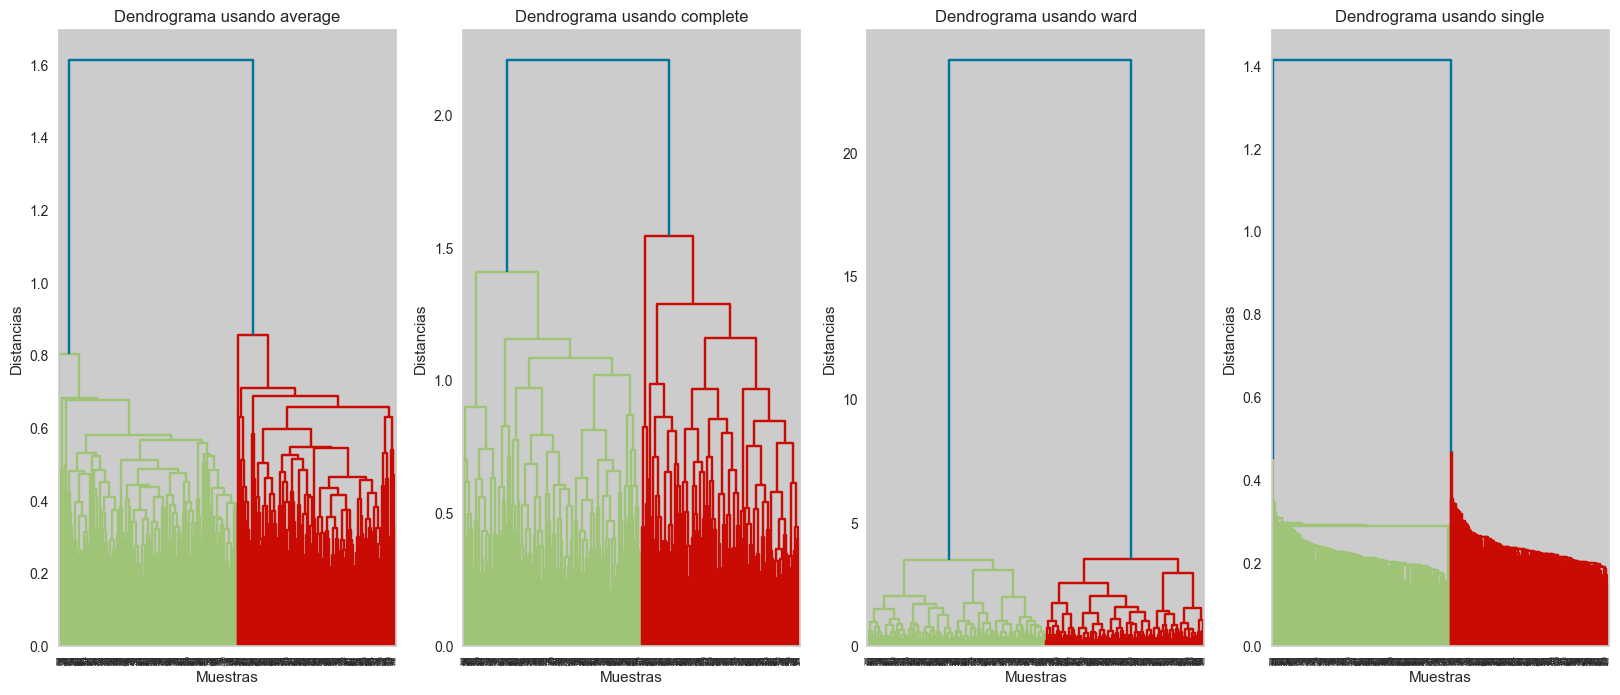

In [26]:
clustering.visualizar_dendrogramas()

- En todos los casos nos crea dos clusters, que por su división suponemos que son de hombres y mujeres.

In [49]:
# Configuraciones de vinculación y métricas de distancia
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'chebyshev']
sc.modelo_aglomerativo_tabla(df_standard, linkage_methods, distance_metrics)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
4,single,cosine,0.934093,0.320823,"{0: 235, 1: 265}",2
28,average,cosine,0.934093,0.320823,"{0: 235, 1: 265}",2
16,complete,cosine,0.934093,0.320823,"{0: 235, 1: 265}",2
5,single,cosine,0.853770,0.314616,"{0: 265, 1: 234, 2: 1}",3
29,average,cosine,0.853770,0.314616,"{0: 265, 1: 234, 2: 1}",3
17,complete,cosine,0.853770,0.314616,"{0: 265, 1: 234, 2: 1}",3
8,single,chebyshev,0.812621,0.322366,"{0: 266, 1: 234}",2
20,complete,chebyshev,0.812596,0.320823,"{0: 265, 1: 235}",2
32,average,chebyshev,0.812596,0.320823,"{0: 235, 1: 265}",2
12,complete,euclidean,0.779468,0.320823,"{0: 235, 1: 265}",2


- Utilizando la función, hemos calculado todas las combinaciones de linkage y distance, y nos quedamos con el mejor resultado, en este caso, podría ser single, average o complete, dado que tienen la misma métrica.

- Vemos que, las métricas tanto del Silhouette como del BDI han mejorado mucho, queriendo que tienda la primera a 1 y la segunda a 0.

- Single coge los dos puntos más cercanos, complete agrupa según la distancia.

- Según la mejor combinación, vamos a aplicar el modelo para calcular los grupos: 

In [52]:
df_aglomerativo = clustering.modelo_aglomerativo(2, "single", df_standard)
df_aglomerativo

,nationality,gender_Female,gender_Male,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,age_minmax,weight_minmax,height_minmax,clusters_agglomerative
0,0.052,1.0,0.0,0.375,0.625,0.714286,0.571429,0.657143,0.293103,0.26,1
1,0.232,0.0,1.0,0.000,0.750,0.285714,0.857143,0.514286,0.603448,0.66,0
2,0.232,0.0,1.0,0.500,0.750,0.714286,0.571429,0.314286,0.482759,0.53,0
3,0.232,0.0,1.0,0.375,0.625,0.428571,0.714286,0.600000,0.724138,0.71,0
4,0.230,1.0,0.0,0.125,0.375,0.571429,0.571429,0.314286,0.120690,0.12,1
...,...,...,...,...,...,...,...,...,...,...,...
495,0.236,0.0,1.0,0.250,0.875,0.428571,0.285714,0.457143,0.672414,0.67,0
496,0.236,1.0,0.0,0.625,0.250,0.857143,0.428571,0.371429,0.103448,0.19,1
497,0.236,0.0,1.0,0.375,0.750,0.714286,0.571429,0.114286,0.637931,0.73,0
498,0.236,1.0,0.0,0.250,0.375,0.285714,0.285714,0.400000,0.465517,0.50,1


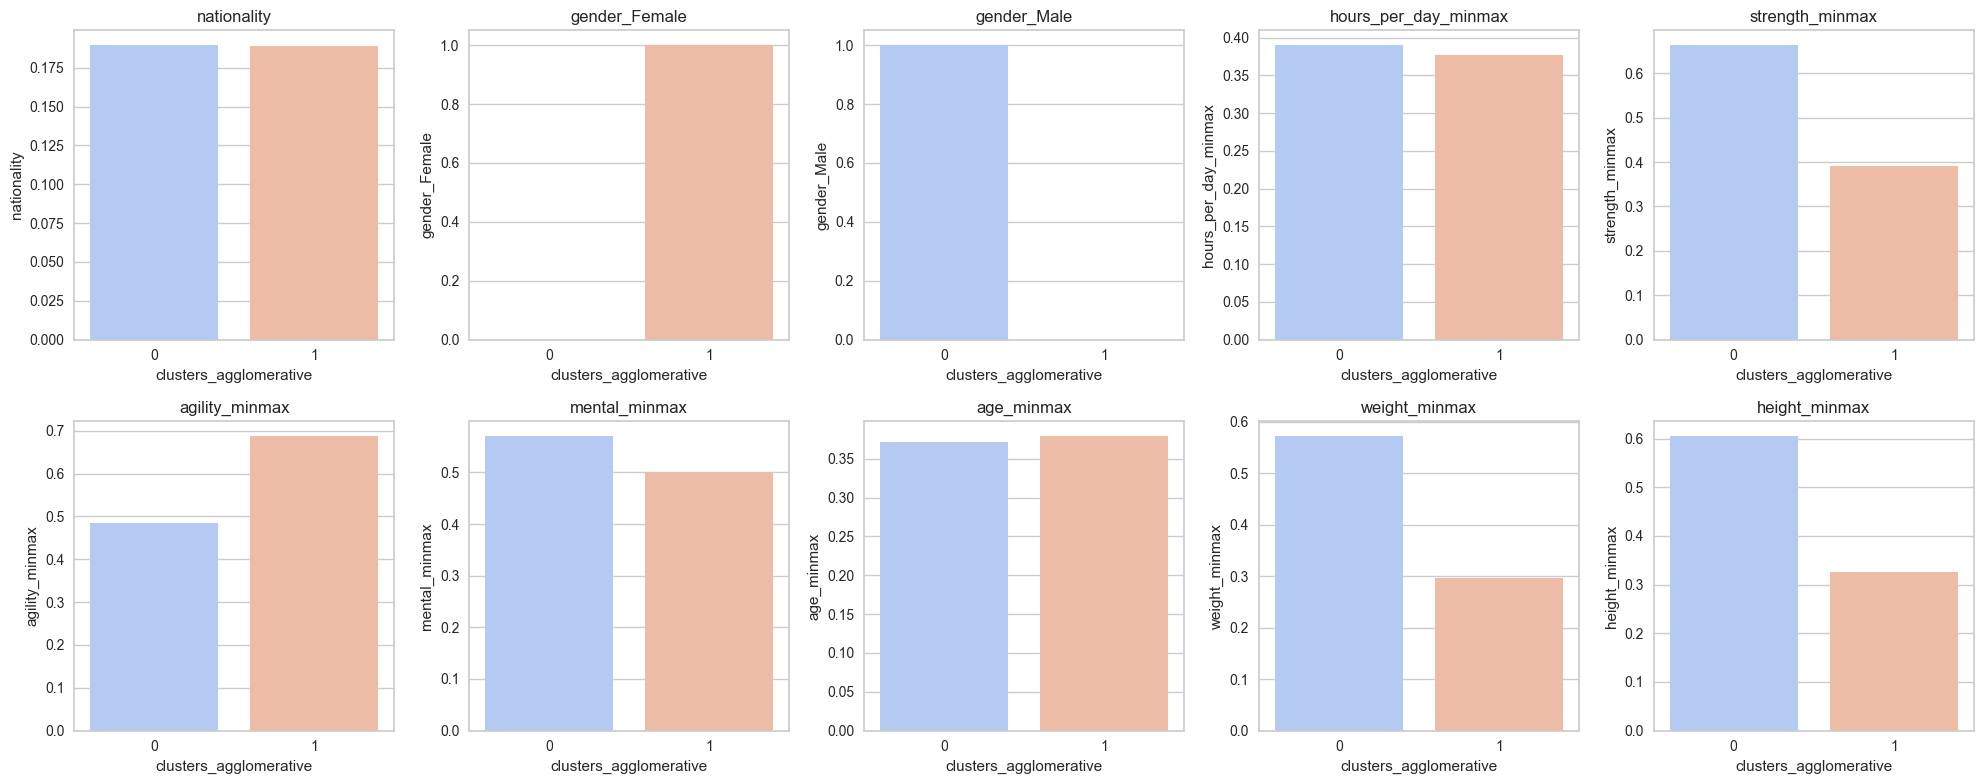

In [53]:
clustering.plot_clusters(df_aglomerativo, "clusters_agglomerative")

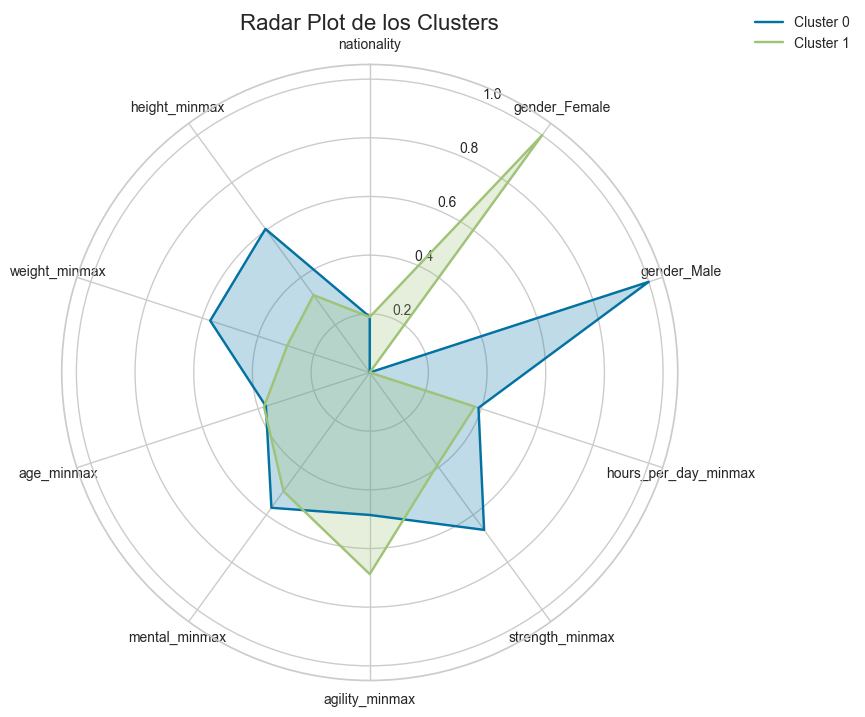

In [66]:
# Variables que deseas incluir en el radar plot
variables = ['nationality', 'gender_Female', 'gender_Male', 'hours_per_day_minmax',
       'strength_minmax', 'agility_minmax', 'mental_minmax', 'age_minmax',
       'weight_minmax', 'height_minmax']

clustering.radar_plot(df_aglomerativo, variables, "clusters_agglomerative")

- Tras realizar los plots de los métodos vemos que, se comportan exactamente igual al método K-Means, con lo cual, las conclusiones serían las mismas.

- Tenemos dos clusters bien definidos: hombres y mujeres. Los hombres pesan más, son más alton y tienen más fuerza, mientras las mujeres son más ágiles.

- Mental y hours_per_day están bastante equiparados.

# DBScan

In [59]:
df_dbscan = clustering.modelo_dbscan(df_standard, eps_values=[1.5, 2, 2.5, 3, 5], min_samples_values=[5, 10, 15, 20])
df_dbscan

eps: 1.5, min_samples: 5, silhouette: 0.7029874534845909
eps: 1.5, min_samples: 10, silhouette: 0.7029874534845909
eps: 1.5, min_samples: 15, silhouette: 0.7029874534845909
eps: 1.5, min_samples: 20, silhouette: 0.7029874534845909
eps: 2, min_samples: 5, silhouette: -1
eps: 2, min_samples: 10, silhouette: -1
eps: 2, min_samples: 15, silhouette: -1
eps: 2, min_samples: 20, silhouette: -1
eps: 2.5, min_samples: 5, silhouette: -1
eps: 2.5, min_samples: 10, silhouette: -1
eps: 2.5, min_samples: 15, silhouette: -1
eps: 2.5, min_samples: 20, silhouette: -1
eps: 3, min_samples: 5, silhouette: -1
eps: 3, min_samples: 10, silhouette: -1
eps: 3, min_samples: 15, silhouette: -1
eps: 3, min_samples: 20, silhouette: -1
eps: 5, min_samples: 5, silhouette: -1
eps: 5, min_samples: 10, silhouette: -1
eps: 5, min_samples: 15, silhouette: -1
eps: 5, min_samples: 20, silhouette: -1


,nationality,gender_Female,gender_Male,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,age_minmax,weight_minmax,height_minmax,clusters_agglomerative,clusters_dbscan
0,0.052,1.0,0.0,0.375,0.625,0.714286,0.571429,0.657143,0.293103,0.26,1,0
1,0.232,0.0,1.0,0.000,0.750,0.285714,0.857143,0.514286,0.603448,0.66,0,1
2,0.232,0.0,1.0,0.500,0.750,0.714286,0.571429,0.314286,0.482759,0.53,0,1
3,0.232,0.0,1.0,0.375,0.625,0.428571,0.714286,0.600000,0.724138,0.71,0,1
4,0.230,1.0,0.0,0.125,0.375,0.571429,0.571429,0.314286,0.120690,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.236,0.0,1.0,0.250,0.875,0.428571,0.285714,0.457143,0.672414,0.67,0,1
496,0.236,1.0,0.0,0.625,0.250,0.857143,0.428571,0.371429,0.103448,0.19,1,0
497,0.236,0.0,1.0,0.375,0.750,0.714286,0.571429,0.114286,0.637931,0.73,0,1
498,0.236,1.0,0.0,0.250,0.375,0.285714,0.285714,0.400000,0.465517,0.50,1,0


- Si comparamos las métricas, vemos que son muy similares a las de KMeans, habiendo creado también 2 clusters.

In [62]:
df_dbscan[['clusters_agglomerative', 'clusters_dbscan']] = df_dbscan[['clusters_agglomerative',
       'clusters_dbscan']].astype('int')

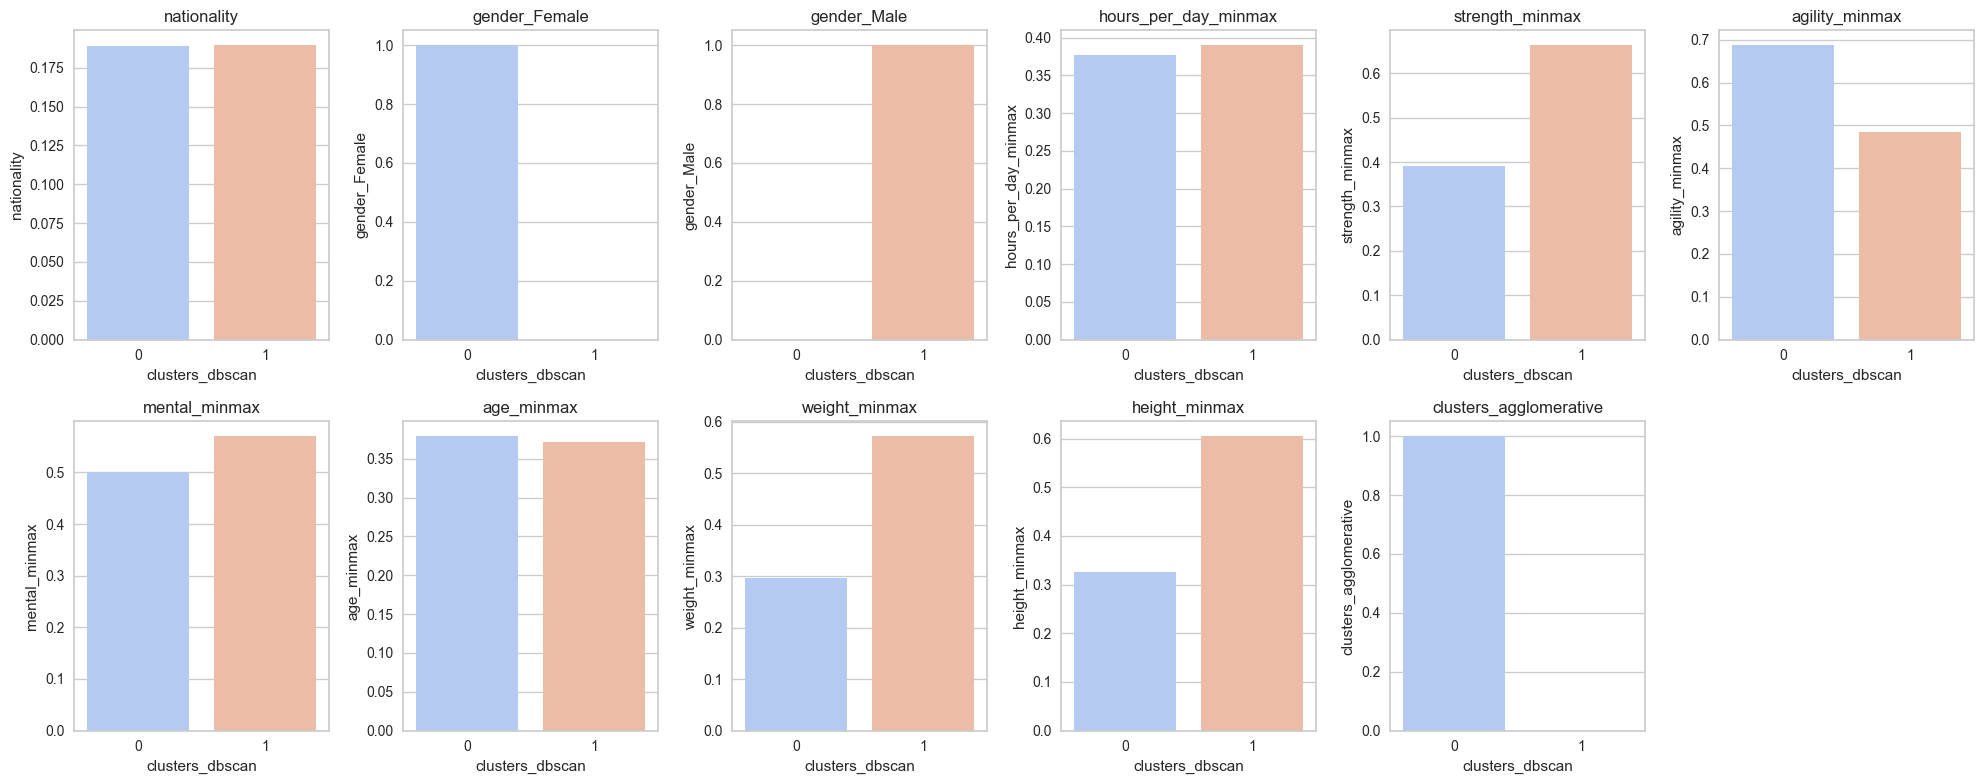

In [63]:
clustering.plot_clusters(df_dbscan, "clusters_dbscan")

- Y vemos que, el resultado es el mismo.

## Vamos ahora a crear cluster de sólo hombres

- Este proceso consiste en crear clusters de un cluster. Nos quedamos con el resultado del aglomerativo, que era el modelo con nuestras mejores métricas. Al mismo tiempo, separaremos únicamente a los hombres (el cluster 1).

In [97]:
df_cluster_hombres = df_aglomerativo[df_aglomerativo['clusters_agglomerative'] == 1]

- Eliminamos las columnas que ya no necesitamos, incluidas las de género que excluiremos en este análisis, además de que, ya hemos filtrado resultados por todo hombres.

In [98]:
df_cluster_hombres.drop(columns= ['clusters_agglomerative',
       'clusters_dbscan', 'gender_Female', 'gender_Male'], inplace= True)

- Usaremos el modelo aglomerativo, por ser con el que mejores resultados obtuvimos en la primera iteración. 
- Probamos primero las combinaciones para elegir la que más pueda ajustarse al conjunto de datos.

In [99]:
# Configuraciones de vinculación y métricas de distancia
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'chebyshev']
sc.modelo_aglomerativo_tabla(df_cluster_hombres, linkage_methods, distance_metrics)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.


,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
4,single,cosine,0.540706,0.503622,"{0: 264, 1: 1}",2
28,average,cosine,0.417356,1.452480,"{0: 8, 1: 257}",2
8,single,chebyshev,0.385490,0.590206,"{0: 264, 1: 1}",2
5,single,cosine,0.342117,0.624254,"{0: 263, 1: 1, 2: 1}",3
29,average,cosine,0.336289,1.364487,"{0: 257, 1: 4, 2: 4}",3
32,average,chebyshev,0.310293,0.805731,"{0: 263, 1: 2}",2
24,average,euclidean,0.297440,0.805731,"{0: 263, 1: 2}",2
0,single,euclidean,0.259770,0.590206,"{0: 264, 1: 1}",2
9,single,chebyshev,0.240958,0.733676,"{0: 2, 1: 1, 2: 262}",3
16,complete,cosine,0.237813,2.598533,"{0: 93, 1: 172}",2


- Vemos que, no tenemos ninguna combinación interesante por valores de Silhouette, DBI y cardinalidad. En los primeros resultados, donde el Silhouette es aceptable, la clusterización resulta en cluster con pocos elementos, incluso 1, lo cual, no tiene sentido lógico.

- Tendremos que coger entonces una combinación donde tengamos clusters con un número repartido de elementos, como el el índice 36 o el 37. Nos quedaremos con el 36 para la prueba.

- Tener un cluster con pocos elementos no es un problema per sé, dependerá del contexto del problema y de nuestros datos, sin embargo, en este caso, entendemos que no es razonable tener clusters tan pequeños, por cuanto son demasiado específicos.

In [100]:
clustering2 = sc.Clustering(df_cluster_hombres)
df_aglomerativo_hombres = clustering2.modelo_aglomerativo(2, "ward", df_cluster_hombres)
df_aglomerativo_hombres

,nationality,hours_per_day_minmax,strength_minmax,agility_minmax,mental_minmax,age_minmax,weight_minmax,height_minmax,clusters_agglomerative
0,0.052,0.375,0.625,0.714286,0.571429,0.657143,0.293103,0.26,1
4,0.230,0.125,0.375,0.571429,0.571429,0.314286,0.120690,0.12,0
9,0.230,0.375,0.375,0.285714,0.285714,0.400000,0.413793,0.45,1
10,0.232,0.500,0.375,0.285714,0.714286,0.400000,0.344828,0.38,1
12,0.230,0.500,0.250,0.571429,0.714286,0.685714,0.568966,0.56,0
...,...,...,...,...,...,...,...,...,...
484,0.230,0.500,0.625,0.714286,0.428571,0.228571,0.293103,0.33,1
488,0.232,0.125,0.125,0.571429,0.571429,0.685714,0.120690,0.17,0
496,0.236,0.625,0.250,0.857143,0.428571,0.371429,0.103448,0.19,0
498,0.236,0.250,0.375,0.285714,0.285714,0.400000,0.465517,0.50,1


- Vamos a realizar plots de nuestros datos para poder analizarlos.

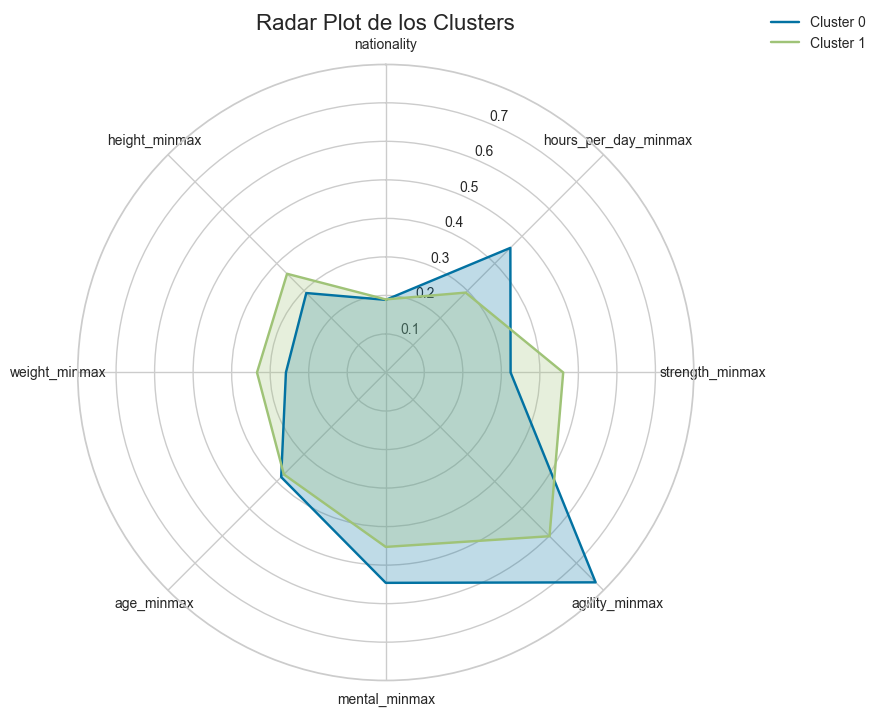

In [101]:
# Variables que deseas incluir en el radar plot
variables = ['nationality', 'hours_per_day_minmax',
       'strength_minmax', 'agility_minmax', 'mental_minmax', 'age_minmax',
       'weight_minmax', 'height_minmax']

clustering.radar_plot(df_aglomerativo_hombres, variables, "clusters_agglomerative")

- Tanto en el radar plot como en los bar plots, podemos observar que el comportamiento es el mismo que, cuando teníamos como features los géneros.

- Tenemos dos clusters bien definidos por, uno con mayor peso, mayor altura y mayor fuerza, y otro por una mayor agilidad, aunque, en comparación con la primera clusterización, en este cluster de hombres únicamente, notamos una diferencia mayor en lo que respecta a agilidad mental y horas invertidas al día en este segfundo grupo con agilidad mayor.

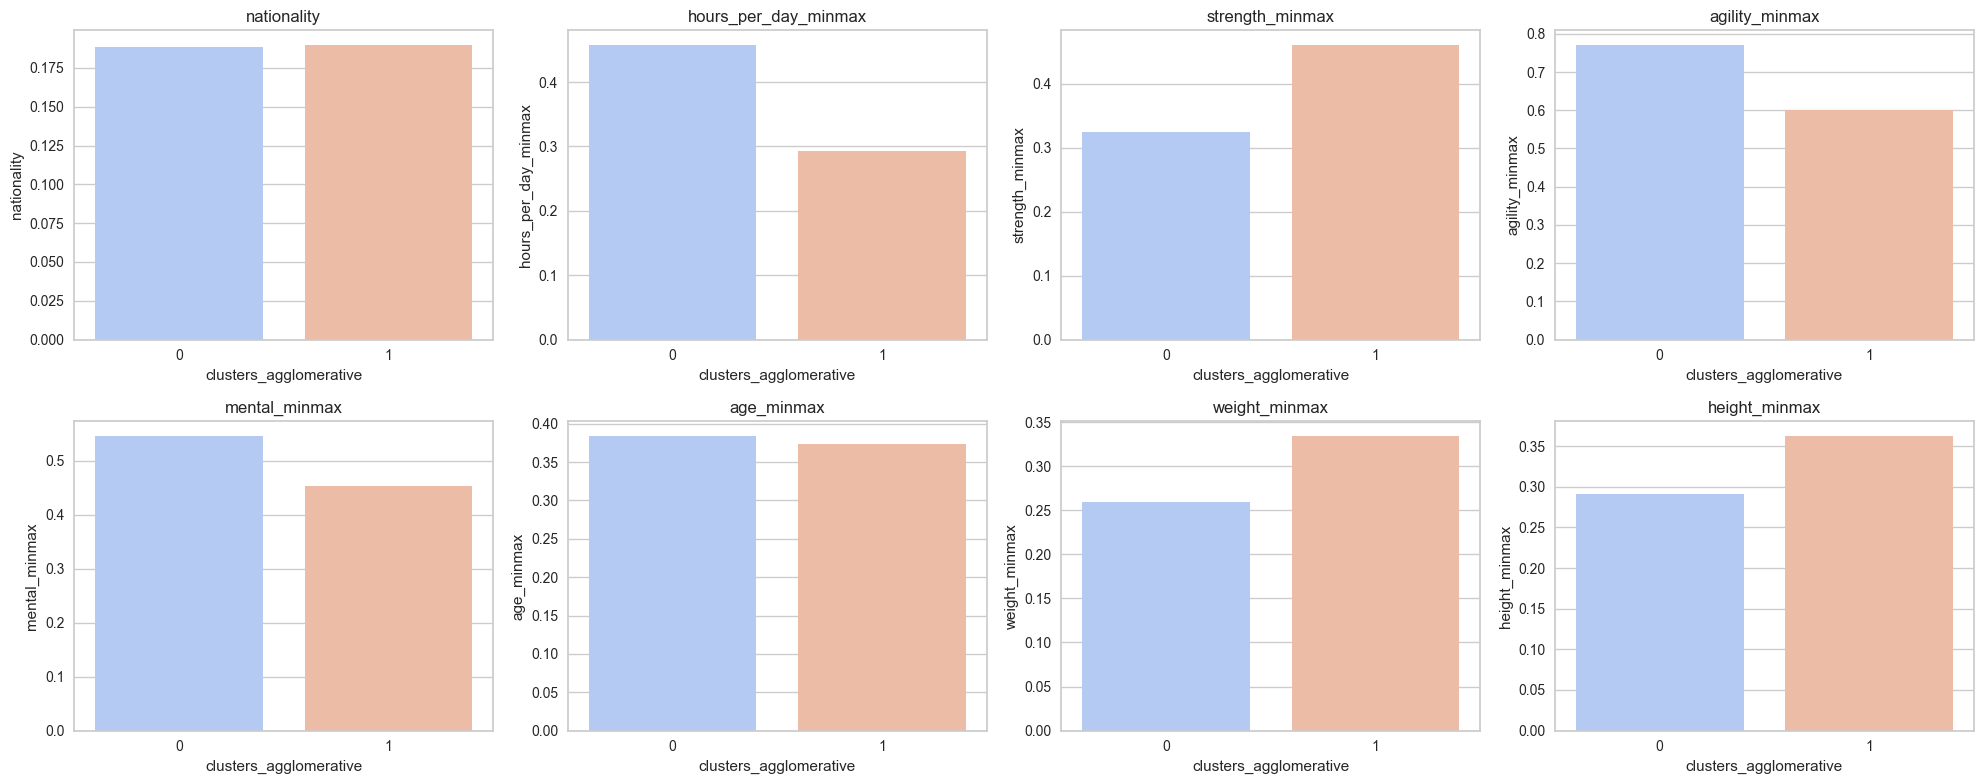

In [96]:
clustering.plot_clusters(df_aglomerativo_hombres, "clusters_agglomerative")